In [2]:
# ErsiliaAPI Class Live Demo
# Demonstrate fetch, serve, run, info, example, close, and delete for one or more models.

In [3]:
# 1) Imports
import pandas as pd

from ersilia.api.create_api import ErsiliaAPI

In [4]:
## 2) Prepare SMILES and Model IDs

In [5]:
smiles_list = ["CCCCO", "C", "CC"]

model_ids = {
    "HDAC3 inhibitors":        "eos1n4b",
    "Carcinogenic potential":  "eos1579",
    "Cardiotoxicity Classifier":"eos1pu1",
    # …add more as desired…
}

In [6]:
## 3) One‐off demo for a single model

In [7]:
# Instantiate and fetch the model
api = ErsiliaAPI("eos1n4b")       # HDAC3 inhibitors
api.fetch(verbose=False)

# Serve (starts a local server—run in its own cell so you can interrupt if needed)
api.serve()

# Run on your SMILES list
api.run(
    input=smiles_list,
    output="output_results.csv",
    batch_size=100
)
df = pd.read_csv("output_results.csv")
display(df.head())

# Inspect model metadata
api.info()

# Generate a small example output (here: 5 samples)
api.example(
    "example_output_pw.csv",   # output prefix
    True,                  # as_json
    True,                  # as_table
    5,                     # n_samples
    False                  # try_predefined
)

# Clean up
api.close()
api.delete()

⬇️  Fetching model eos1n4b: hdac3-inhibition
Getting model source
Model doesn't exist on your system, fetching it now.
Initiating fetch from DockerHub — this process may take some time...
Writing model source to file
👍 Model eos1n4b fetched successfully!
Serving model. This process may take some time...
🚀 Serving model eos1n4b: hdac3-inhibition

   URL: http://0.0.0.0:55630
   SRV: pulled_docker
   Session: /Users/patrickwalsh/eos/sessions/session_93749

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 0.7251 seconds
Output is being generated within: 0.79061 seconds
✅ The output successfully generated in output_results.csv file!


,key,input,hdac3_inhibition_probability
0,ebf0d0b3c02b378d6567c12c068c75f4,CCCCO,0.003385
1,0d61f8370cad1d412f80b84d143e1257,C,0.000374
2,aa53ca0b650dfd85c4f59fa156f7a2cc,CC,0.000476


🚀 Identifying HDAC3 inhibitors
The model predicts the inhibitory potential of small molecules against Histone deacetylase 3 (HDAC3), a relevant human target for cancer, inflammation, neurodegenerative diseases and diabetes. The authors have used a dataset of 1098 compounds from ChEMBL and validated the model using the benchmark MUBD-HDAC3.

💁 Identifiers
Model identifiers: eos1n4b
Slug: hdac3-inhibition

🤓 Code and parameters
GitHub: https://github.com/ersilia-os/eos1n4b
AWS S3: https://ersilia-models-zipped.s3.eu-central-1.amazonaws.com/eos1n4b.zip

🐋 Docker
Docker Hub: https://hub.docker.com/r/ersiliaos/eos1n4b
Architectures: AMD64

For more information, please visit https://ersilia.io/model-hub
✅ Examples successfully saved to example_output_pw.csv
⛔ Model eos1n4b closed
Deleting model eos1n4b
💥 Model eos1n4b deleted successfully!


## HDAC3/Cardiotoxicity Demo

Profiling small molecules using two Ersilia models in tandem:

- **HDAC3 Inhibitor Model (`eos1n4b`)**  
  - Predicts the inhibitory potential of compounds against Histone deacetylase 3 (HDAC3), a key target in cancer, inflammation and neurodegeneration.  
- **Cardiotoxicity Classifier (`eos1pu1`)**  
  - Estimates the risk of drug-induced cardiotoxicity, providing a probability score based on chemical descriptors and biological signatures.

1. **Sample Generation**  
   - Use the HDAC3 model’s `example()` endpoint to generate a set of representative SMILES strings.  
   - Ensures both models see the same chemically relevant inputs.

2. **Parallel Predictions**  
   - **HDAC3 Inhibition**: Compute an activity score for each SMILES.  
   - **Cardiotoxicity Risk**: Compute a cardiotoxicity probability for the same SMILES.

3. **Comparative Analysis**  
   - Identify molecules that are **potent HDAC3 inhibitors** with **low cardiotoxicity** (ideal leads),  
     or conversely those with conflicting profiles that may require structural optimization.

4. **Model Lifecycle Management**  
   - Illustrates the full ErsiliaAPI cycle:  
     `fetch()` → `serve()` → `example()` → `run()` → `close()` → `delete()`,  
     ensuring reproducibility, performance, and resource cleanup.

In [8]:
# %% 1) Imports & pre-fetch/serve both models
import pandas as pd

from ersilia.api.create_api import ErsiliaAPI

# HDAC3 inhibitors
hdac3_api = ErsiliaAPI("eos1n4b")
hdac3_api.fetch(verbose=False)

# Cardiotoxicity Classifier
cardio_api = ErsiliaAPI("eos1pu1")
cardio_api.fetch(verbose=False)

⬇️  Fetching model eos1n4b: hdac3-inhibition
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos1n4b failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.
⬇️  Fetching model eos1pu1: cardiotox-dictrank
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos1pu1 failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.


In [12]:
# %% 2) HDAC3 model: example → run
# 2a) Generate 5 example SMILES
hdac3_api.serve()
hdac3_api.example(
    "hdac3_samples.csv",
    simple=True,        # only SMILES column
    random=False,       # sample from model’s built-in examples if available
    n_samples=5,
    deterministic=False
)
df_hdac3_examples = pd.read_csv("hdac3_samples.csv")
print("HDAC3 example SMILES:")
display(df_hdac3_examples)

# 2b) Predict inhibitory potential
hdac3_api.run(
    input=df_hdac3_examples["input"].tolist(),
    output="hdac3_predictions.csv",
    batch_size=5
)
df_hdac3_pred = pd.read_csv("hdac3_predictions.csv")
print("HDAC3 predictions:")
display(df_hdac3_pred)

Serving model. This process may take some time...
🚀 Serving model eos1n4b: hdac3-inhibition

   URL: http://0.0.0.0:50572
   SRV: pulled_docker
   Session: /Users/patrickwalsh/eos/sessions/session_70883

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
No predefined examples found for the model. Generating random examples.
✅ Examples successfully saved to hdac3_samples.csv
HDAC3 example SMILES:


,input
0,OC(=O)CN(CCN(CC(O)=O)CC(O)=O)CCN(CC(O)=O)CC(O)=O
1,[H][C@@]12CC(=O)N1[C@@H](C(O)=O)[C@](C)(Cn1cc[...
2,FC(F)(F)c1ccc(CCN2CCC3(CC2)OC(=O)Nc2ccccc32)cc1
3,CCS(=O)(=O)N1CC(CC#N)(C1)n1cc(cn1)-c1ncnc2[nH]...
4,CCOc1ccc2nc(sc2c1)S(N)(=O)=O


Starting runner
Running batch 1
Batch 1 response fetched within: 0.9262 seconds
Output is being generated within: 1.01028 seconds
✅ The output successfully generated in hdac3_predictions.csv file!
HDAC3 predictions:


,key,input,hdac3_inhibition_probability
0,7d32633741f575b15e7a5e15642ca965,OC(=O)CN(CCN(CC(O)=O)CC(O)=O)CCN(CC(O)=O)CC(O)=O,0.001670
1,94634f5cc4be189901b1085b340c4d2e,[H][C@@]12CC(=O)N1[C@@H](C(O)=O)[C@](C)(Cn1cc[...,0.039806
2,ee5340dd9e9bc03c45a9c4cc1ba44416,FC(F)(F)c1ccc(CCN2CCC3(CC2)OC(=O)Nc2ccccc32)cc1,0.222362
3,ea126e7059042c39a6edb1355b0257d6,CCS(=O)(=O)N1CC(CC#N)(C1)n1cc(cn1)-c1ncnc2[nH]...,0.831534
4,9fd7a350a4677316e8209900796b9775,CCOc1ccc2nc(sc2c1)S(N)(=O)=O,0.805904


In [14]:
# %% 3) Cardiotoxicity model: example → run
# 3a) Generate 5 example SMILES
cardio_api.serve()
cardio_api.example(
    "cardio_samples.csv",
    simple=True,
    random=False,
    n_samples=5,
    deterministic=False
)
df_cardio_examples = pd.read_csv("cardio_samples.csv")
print("Cardiotoxicity example SMILES:")
display(df_cardio_examples)

# 3b) Predict cardiotoxicity risk
cardio_out = cardio_api.run(
    input=df_cardio_examples["input"].tolist(),
    output="cardio_predictions.csv",
    batch_size=5
)
df_cardio_pred = pd.read_csv("cardio_predictions.csv")
print("Cardiotoxicity predictions:")
display(df_cardio_pred)

Serving model. This process may take some time...
🚀 Serving model eos1pu1: cardiotox-dictrank

   URL: http://0.0.0.0:50659
   SRV: pulled_docker
   Session: /Users/patrickwalsh/eos/sessions/session_70883

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
No predefined examples found for the model. Generating random examples.
✅ Examples successfully saved to cardio_samples.csv
Cardiotoxicity example SMILES:


,input
0,OC(=O)c1ccc(cc1)S(=O)(=O)N(Cc1ccc(OC(F)(F)F)cc...
1,Cc1cn2cc(CC(=O)N3CCC4(CN(C4)[C@@H]4CCc5cc(ccc4...
2,O=c1n2CCCCCc2nc2ccccc12
3,COc1cc(\C=C2/CCC\C(=C/c3ccc(O)c(OC)c3)C2=O)ccc1O
4,OC(=O)c1cc(C(O)=O)c(cc1C(O)=O)C(=O)N(Cc1cccc(O...


Starting runner
Running batch 1
Batch 1 response fetched within: 5.4259 seconds
Output is being generated within: 5.57123 seconds
✅ The output successfully generated in cardio_predictions.csv file!
Cardiotoxicity predictions:


,key,input,cardiotoxicity_risk
0,c75eedc877bdd0c88aa1a97ed63c720a,OC(=O)c1ccc(cc1)S(=O)(=O)N(Cc1ccc(OC(F)(F)F)cc...,0.565675
1,497c0a25e2c4a11d6f3a8455071e67d5,Cc1cn2cc(CC(=O)N3CCC4(CN(C4)[C@@H]4CCc5cc(ccc4...,0.817581
2,ecd6d3da0dd0f1ed63ab9f5fa3ba4baa,O=c1n2CCCCCc2nc2ccccc12,0.746324
3,5330e9b848ec864b94684b68dbda4c78,COc1cc(\C=C2/CCC\C(=C/c3ccc(O)c(OC)c3)C2=O)ccc1O,0.534614
4,6a383aa5ebb9b029f25c0a3f92816c5d,OC(=O)c1cc(C(O)=O)c(cc1C(O)=O)C(=O)N(Cc1cccc(O...,0.478614


In [15]:
# %% 4) Cleanup: close & delete both models
for api in (hdac3_api, cardio_api):
    api.close()
    api.delete()

print("Done — models shut down and cleaned up.")

⛔ Model eos1n4b closed
Deleting model eos1n4b
💥 Model eos1n4b deleted successfully!
⛔ Model eos1pu1 closed
Deleting model eos1pu1
💥 Model eos1pu1 deleted successfully!
Done — models shut down and cleaned up.


# GLP-1 Small Molecule Evaluation with Ersilia API

Evaluating small molecules that may act as GLP-1 receptor modulators (permeability, pharmacokinetics, toxicity, and metabolism)

We use a small input set of candidate molecules (represented as SMILES strings) and run them through the following models:

---

## Models Used

### 1. `eos9p4a` – Drug-likeness Scoring
Evaluates drug-likeness using an **unsupervised RNN** trained on known drug SMILES strings. Helps filter molecules that conform to common features in approved drugs, without needing labeled data.

### 2. `eos3mk2` – Blood-Brain Barrier (BBB) Permeability
A set of 3 binary classifiers (RF, GBC, Logistic Regression) trained on 300 compounds. Estimates whether a compound is likely to **cross the BBB**, important for CNS-related effects like appetite suppression.

### 3. `eos39dp` – Pharmacokinetics Profiler (PhaKinPro)
Predicts 12 PK endpoints such as absorption, distribution, and clearance using a curated dataset of 10,000 compounds. Each prediction includes **confidence scores** and **applicability domain** checks.

### 4. `eos5gge` – Drug-Induced Liver Injury (DILI) Predictor
Trained on the FDA's DILIst dataset, this model predicts **10 features related to liver toxicity**. Important for early de-risking of compounds.

### 5. `eos3ev6` – CYP3A4 Metabolism Model
Predicts whether a compound **inhibits or is a substrate** of the CYP3A4 enzyme — a key player in drug metabolism. Helps flag potential **drug-drug interactions** or metabolic clearance issues.


In [30]:
# ## Setup
import pandas as pd

from ersilia.api.create_api import ErsiliaAPI

# Sample input molecules (GLP-1R modulator candidates, in SMILES format)
input_smiles = [
    "CC(C)(C)OC(=O)NCCCCC1=C(C=CC(=C1)C2=CC=CC=C2)C(=O)NCC3=CC=CC=C3",        # Boc5 (non-peptide GLP-1R agonist)
    "CCOC(=O)C1=CC=C(C=C1)NC(=O)C2=CC=CN=C2",    # TT-OAD2 (Pfizer - orally available)
    "CN1CCC[C@H]1COC(=O)[C@@H]2CCC3=CC=CC=C3C2",           # In development
    "CC(C)NC1=CC=CC=C1OC2=NC=CC=C2" # partial GLP-1 agonist
    "CCN(CC)CCOC1=CC=CC=C1C(=O)NCC2=CC=CC=C2" # fragment-sized binder
]

input_path = "glp1_input.csv"
pd.DataFrame({"SMILES": input_smiles}).to_csv(input_path, index=False)

In [31]:
# ## Drug-likeness prediction (unsupervised)
druglike_model = ErsiliaAPI("eos9p4a")
druglike_model.fetch(verbose=False)
druglike_model.serve()
druglike_model.run(input=input_path, output="druglikeness.csv", batch_size=50)
druglike_model.close()

⬇️  Fetching model eos9p4a: deep-dl
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos9p4a failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.
Serving model. This process may take some time...
🚀 Serving model eos9p4a: deep-dl

   URL: http://0.0.0.0:56606
   SRV: pulled_docker
   Session: /Users/patrickwalsh/eos/sessions/session_93749

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 5.2996 seconds
Output is being generated within: 5.45185 seconds
✅ The output successfully generated in druglikeness.csv file!
⛔ Model eos9p4a closed


In [32]:
# ## BBB Permeability
bbb_model = ErsiliaAPI("eos3mk2")
bbb_model.fetch(verbose=False)
bbb_model.serve()
bbb_model.run(input=input_path, output="bbb.csv", batch_size=50)
bbb_model.close()

⬇️  Fetching model eos3mk2: bbbp-marine-kinase-inhibitors
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos3mk2 failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.
Serving model. This process may take some time...
🚀 Serving model eos3mk2: bbbp-marine-kinase-inhibitors

   URL: http://0.0.0.0:56624
   SRV: pulled_docker
   Session: /Users/patrickwalsh/eos/sessions/session_93749

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 4.6129 seconds
Output is being generated within: 4.75180 seconds
✅ The output successfully generated in bbb.csv file!
⛔ Model eos3mk2 closed


In [33]:
# ## Pharmacokinetics profiling
pk_model = ErsiliaAPI("eos39dp")
pk_model.fetch(verbose=False)
pk_model.serve()
pk_model.run(input=input_path, output="pk.csv", batch_size=50)
pk_model.close()

⬇️  Fetching model eos39dp: phakinpro
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos39dp failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.
Serving model. This process may take some time...
🚀 Serving model eos39dp: phakinpro

   URL: http://0.0.0.0:56643
   SRV: pulled_docker
   Session: /Users/patrickwalsh/eos/sessions/session_93749

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 4.4655 seconds
Output is being generated within: 4.67486 seconds
✅ The output successfully generated in pk.csv file!
⛔ Model eos39dp closed


In [34]:
# ## DILI Toxicity
liver_model = ErsiliaAPI("eos5gge")
liver_model.fetch(verbose=False)
liver_model.serve()
liver_model.run(input=input_path, output="dili.csv", batch_size=50)
liver_model.close()

⬇️  Fetching model eos5gge: dili-predictor
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos5gge failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.
Serving model. This process may take some time...
🚀 Serving model eos5gge: dili-predictor

   URL: http://0.0.0.0:56665
   SRV: pulled_docker
   Session: /Users/patrickwalsh/eos/sessions/session_93749

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 8.5256 seconds
Output is being generated within: 8.68869 seconds
✅ The output successfully generated in dili.csv file!
⛔ Model eos5gge closed


In [35]:
# ## CYP3A4 Metabolism
cyp_model = ErsiliaAPI("eos3ev6")
cyp_model.fetch(verbose=False)
cyp_model.serve()
cyp_model.run(input=input_path, output="cyp3a4.csv", batch_size=50)
cyp_model.close()

⬇️  Fetching model eos3ev6: ncats-cyp3a4
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos3ev6 failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.
Serving model. This process may take some time...
🚀 Serving model eos3ev6: ncats-cyp3a4

   URL: http://0.0.0.0:56686
   SRV: pulled_docker
   Session: /Users/patrickwalsh/eos/sessions/session_93749

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 15.0163 seconds
Output is being generated within: 15.25203 seconds
✅ The output successfully generated in cyp3a4.csv file!
⛔ Model eos3ev6 closed


In [36]:
# ## Aggregate Results
results = [
    pd.read_csv("druglikeness.csv"),
    pd.read_csv("bbb.csv"),
    pd.read_csv("pk.csv"),
    pd.read_csv("dili.csv"),
    pd.read_csv("cyp3a4.csv"),
]

final = pd.concat(results, axis=1)
display(final)

,key,input,druglikeness_score,key,input,rfc_score,gbc_score,logreg_score,key,input,...,reactive_metabolite,human_hepatotoxicity,animal_hepatotoxicity_a,animal_hepatotoxicity_b,preclinical_hepatotoxicity,diverse_dili_a,key,input,cyp3a4_inhib,cyp3a4_subs
0,39c0f63188898ad17c777f0f33c216fb,CC(C)(C)OC(=O)NCCCCC1=C(C=CC(=C1)C2=CC=CC=C2)C...,50.696438,39c0f63188898ad17c777f0f33c216fb,CC(C)(C)OC(=O)NCCCCC1=C(C=CC(=C1)C2=CC=CC=C2)C...,0.210817,0.001628,0.289626,39c0f63188898ad17c777f0f33c216fb,CC(C)(C)OC(=O)NCCCCC1=C(C=CC(=C1)C2=CC=CC=C2)C...,...,0.100403,0.750928,0.286061,0.567607,0.802303,0.294670,39c0f63188898ad17c777f0f33c216fb,CC(C)(C)OC(=O)NCCCCC1=C(C=CC(=C1)C2=CC=CC=C2)C...,0.338,0.314
1,6cfb30ce0fdebe0131080840adef1c06,CCOC(=O)C1=CC=C(C=C1)NC(=O)C2=CC=CN=C2,83.991592,6cfb30ce0fdebe0131080840adef1c06,CCOC(=O)C1=CC=C(C=C1)NC(=O)C2=CC=CN=C2,0.262081,0.005235,0.196863,6cfb30ce0fdebe0131080840adef1c06,CCOC(=O)C1=CC=C(C=C1)NC(=O)C2=CC=CN=C2,...,0.106252,0.567607,0.528850,0.623451,0.752328,0.499081,6cfb30ce0fdebe0131080840adef1c06,CCOC(=O)C1=CC=C(C=C1)NC(=O)C2=CC=CN=C2,0.528,0.589
2,ab2cf3a8fe98e17200c426f146e3129c,CN1CCC[C@H]1COC(=O)[C@@H]2CCC3=CC=CC=C3C2,70.291664,ab2cf3a8fe98e17200c426f146e3129c,CN1CCC[C@H]1COC(=O)[C@@H]2CCC3=CC=CC=C3C2,0.475420,0.998875,0.608655,ab2cf3a8fe98e17200c426f146e3129c,CN1CCC[C@H]1COC(=O)[C@@H]2CCC3=CC=CC=C3C2,...,0.075374,0.284351,0.604153,0.605181,0.570830,0.365069,ab2cf3a8fe98e17200c426f146e3129c,CN1CCC[C@H]1COC(=O)[C@@H]2CCC3=CC=CC=C3C2,0.251,0.304
3,a874a7e57366ecfd05c9a17500247a9c,CC(C)NC1=CC=CC=C1OC2=NC=CC=C2CCN(CC)CCOC1=CC=C...,32.113968,a874a7e57366ecfd05c9a17500247a9c,CC(C)NC1=CC=CC=C1OC2=NC=CC=C2CCN(CC)CCOC1=CC=C...,0.193763,0.000010,0.810025,a874a7e57366ecfd05c9a17500247a9c,CC(C)NC1=CC=CC=C1OC2=NC=CC=C2CCN(CC)CCOC1=CC=C...,...,0.133363,0.649672,0.216767,0.461855,0.753540,0.196336,a874a7e57366ecfd05c9a17500247a9c,CC(C)NC1=CC=CC=C1OC2=NC=CC=C2CCN(CC)CCOC1=CC=C...,0.512,0.586


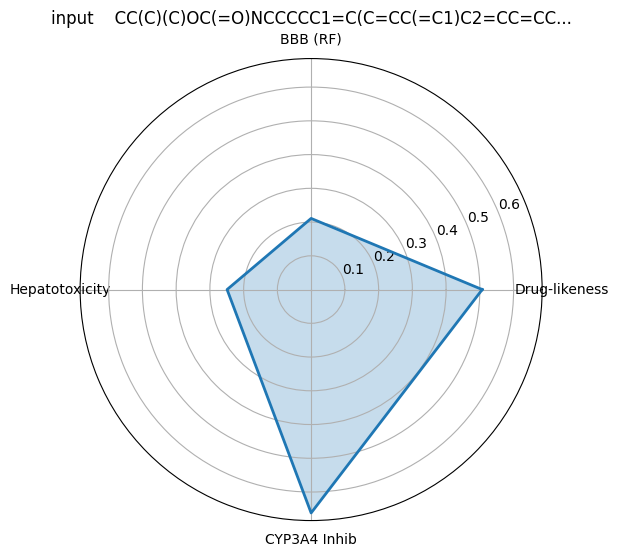

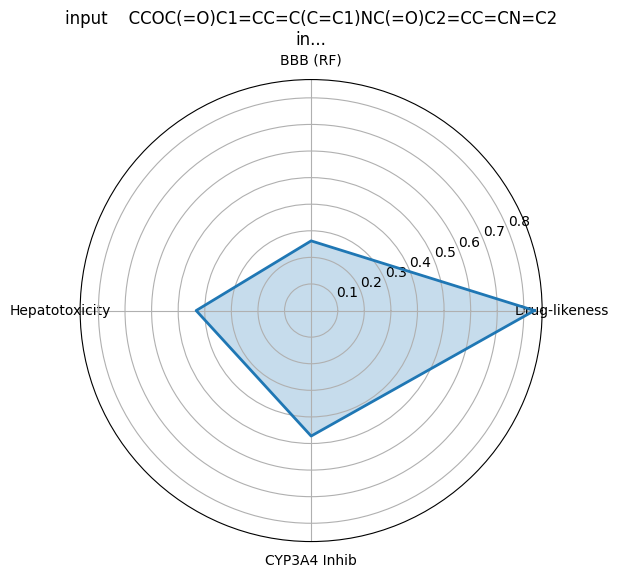

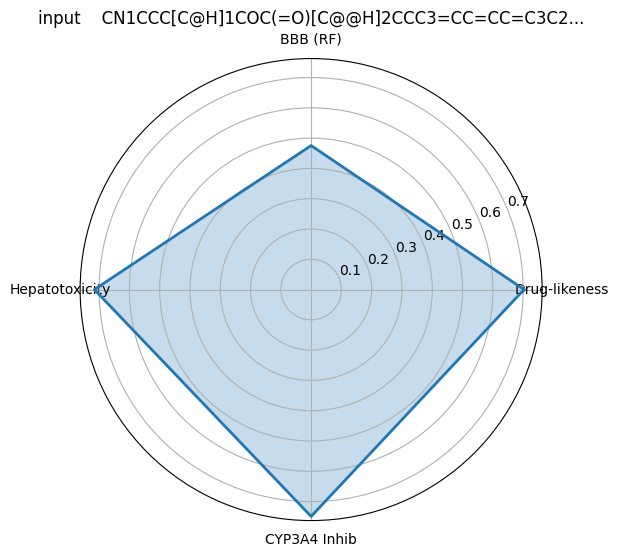

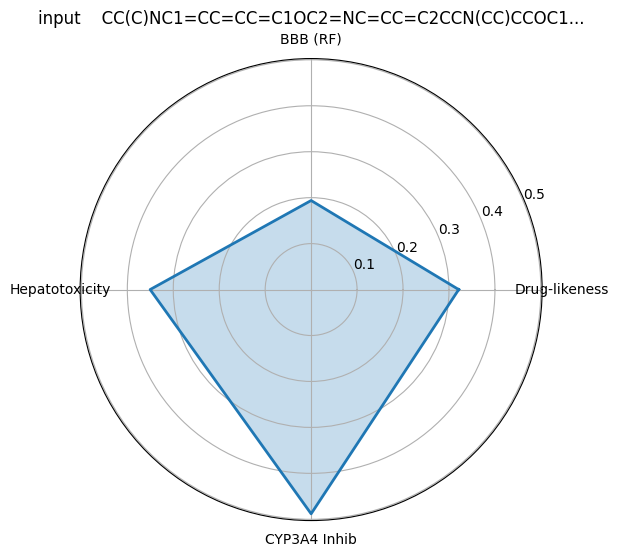

In [42]:
for i, row in final.iterrows():
    scores = {
        "Drug-likeness": row["druglikeness_score"] / 100,
        "BBB (RF)": row["rfc_score"],
        "Hepatotoxicity": 1 - row["human_hepatotoxicity"],
        "CYP3A4 Inhib": 1 - row["cyp3a4_inhib"],
    }
    plot_radar(molecule_name=str(row["input"])[:50] + "...", scores_dict=scores)

def compute_composite_score(row):
    druglikeness = row["druglikeness_score"] / 100  # Normalize to [0, 1]
    bbb = row["rfc_score"]
    hepatotox = 1 - row["human_hepatotoxicity"]     # Inverted
    cyp_inhib = 1 - row["cyp3a4_inhib"]              # Inverted

    return (
        0.30 * druglikeness +
        0.25 * bbb +
        0.25 * hepatotox +
        0.20 * cyp_inhib
    )

final["composite_score"] = final.apply(compute_composite_score, axis=1)
final_sorted = final.sort_values("composite_score", ascending=False)


In [40]:
def compute_composite_score(row):
    druglikeness = row["druglikeness_score"] / 100  # Normalize to [0, 1]
    bbb = row["rfc_score"]
    hepatotox = 1 - row["human_hepatotoxicity"]     # Inverted
    cyp_inhib = 1 - row["cyp3a4_inhib"]              # Inverted

    return (
        0.30 * druglikeness +
        0.25 * bbb +
        0.25 * hepatotox +
        0.20 * cyp_inhib
    )

final["composite_score"] = final.apply(compute_composite_score, axis=1)
final_sorted = final.sort_values("composite_score", ascending=False)
display(final_sorted)

,key,input,druglikeness_score,key,input,rfc_score,gbc_score,logreg_score,key,input,...,human_hepatotoxicity,animal_hepatotoxicity_a,animal_hepatotoxicity_b,preclinical_hepatotoxicity,diverse_dili_a,key,input,cyp3a4_inhib,cyp3a4_subs,composite_score
2,ab2cf3a8fe98e17200c426f146e3129c,CN1CCC[C@H]1COC(=O)[C@@H]2CCC3=CC=CC=C3C2,70.291664,ab2cf3a8fe98e17200c426f146e3129c,CN1CCC[C@H]1COC(=O)[C@@H]2CCC3=CC=CC=C3C2,0.475420,0.998875,0.608655,ab2cf3a8fe98e17200c426f146e3129c,CN1CCC[C@H]1COC(=O)[C@@H]2CCC3=CC=CC=C3C2,...,0.284351,0.604153,0.605181,0.570830,0.365069,ab2cf3a8fe98e17200c426f146e3129c,CN1CCC[C@H]1COC(=O)[C@@H]2CCC3=CC=CC=C3C2,0.251,0.304,0.658442
1,6cfb30ce0fdebe0131080840adef1c06,CCOC(=O)C1=CC=C(C=C1)NC(=O)C2=CC=CN=C2,83.991592,6cfb30ce0fdebe0131080840adef1c06,CCOC(=O)C1=CC=C(C=C1)NC(=O)C2=CC=CN=C2,0.262081,0.005235,0.196863,6cfb30ce0fdebe0131080840adef1c06,CCOC(=O)C1=CC=C(C=C1)NC(=O)C2=CC=CN=C2,...,0.567607,0.528850,0.623451,0.752328,0.499081,6cfb30ce0fdebe0131080840adef1c06,CCOC(=O)C1=CC=C(C=C1)NC(=O)C2=CC=CN=C2,0.528,0.589,0.519993
0,39c0f63188898ad17c777f0f33c216fb,CC(C)(C)OC(=O)NCCCCC1=C(C=CC(=C1)C2=CC=CC=C2)C...,50.696438,39c0f63188898ad17c777f0f33c216fb,CC(C)(C)OC(=O)NCCCCC1=C(C=CC(=C1)C2=CC=CC=C2)C...,0.210817,0.001628,0.289626,39c0f63188898ad17c777f0f33c216fb,CC(C)(C)OC(=O)NCCCCC1=C(C=CC(=C1)C2=CC=CC=C2)C...,...,0.750928,0.286061,0.567607,0.802303,0.294670,39c0f63188898ad17c777f0f33c216fb,CC(C)(C)OC(=O)NCCCCC1=C(C=CC(=C1)C2=CC=CC=C2)C...,0.338,0.314,0.399462
3,a874a7e57366ecfd05c9a17500247a9c,CC(C)NC1=CC=CC=C1OC2=NC=CC=C2CCN(CC)CCOC1=CC=C...,32.113968,a874a7e57366ecfd05c9a17500247a9c,CC(C)NC1=CC=CC=C1OC2=NC=CC=C2CCN(CC)CCOC1=CC=C...,0.193763,0.000010,0.810025,a874a7e57366ecfd05c9a17500247a9c,CC(C)NC1=CC=CC=C1OC2=NC=CC=C2CCN(CC)CCOC1=CC=C...,...,0.649672,0.216767,0.461855,0.753540,0.196336,a874a7e57366ecfd05c9a17500247a9c,CC(C)NC1=CC=CC=C1OC2=NC=CC=C2CCN(CC)CCOC1=CC=C...,0.512,0.586,0.329965
